In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [5]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
df = df[['pclass', 'sex', 'age', 'survived']]

In [7]:
df = df.dropna()

In [8]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [10]:
X = df[['pclass', 'sex', 'age']]
y = df['survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)

Accuracy: 0.7762237762237763


In [14]:
pclass = int(input("Enter class (1,2,3): "))
sex = input("Enter gender (male/female): ")
age = float(input("Enter age: "))
sex_num = 0 if sex == "male" else 1
prediction = clf.predict([[pclass, sex_num, age]])[0]
result = "Survived ⯑" if prediction == 1 else "Not Survived ⯑"
print("Prediction:", result)


Enter class (1,2,3): 3
Enter gender (male/female): female
Enter age: 23
Prediction: Survived ⯑


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


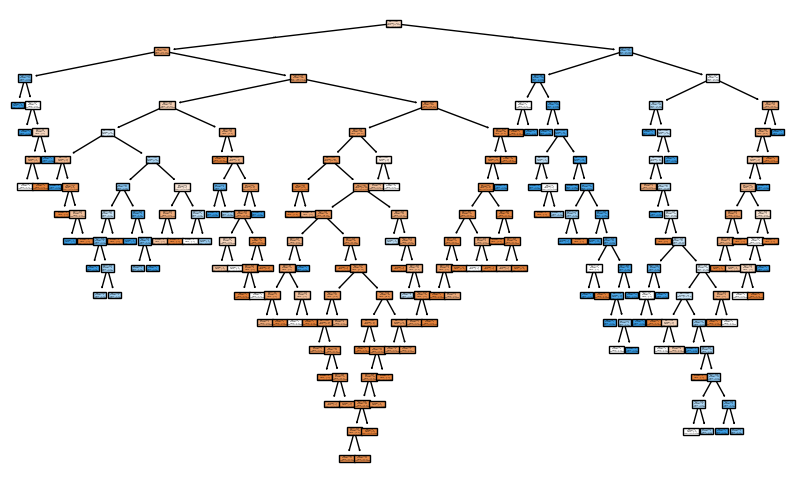

In [15]:
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"],filled=True)
plt.show()